In [184]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve

In [185]:
df=pd.read_csv("creditcard.csv",index_col= False)
print('Shape of the data set is {}'.format(df.shape))

Shape of the data set is (284807, 31)


In [186]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [187]:
df= shuffle(df)

In [188]:
X= df
y= df['Class']
print("Original Dimensions of X:{} and y:{} ". format(X.shape, y.shape))

Original Dimensions of X:(284807, 31) and y:(284807,) 


In [189]:
print(y.head())

14752     0
74693     0
271209    0
191730    0
77941     0
Name: Class, dtype: int64


In [190]:
X,y= shuffle(X,y,random_state=1)

In [191]:
## Split the data set into train test and split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.15)
X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.15)


In [192]:
# Standardizing the Amount and Time , so that they contribute equally
from sklearn.preprocessing import StandardScaler
df['Amount_Scaled'] = StandardScaler().fit_transform(df['Amount'].reshape(-1,1))
df['Scaled_Time'] = StandardScaler().fit_transform(df['Time'].reshape(-1,1))


C:\Users\Koundinya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Koundinya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [193]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Scaled,Scaled_Time
14752,25982.0,-1.039973,1.299918,0.910992,-0.348601,0.201290,0.028092,0.753058,0.088520,0.269582,...,0.014409,-0.403298,-0.120226,0.097516,0.430505,0.035061,35.99,0,-0.209338,-1.449456
74693,55707.0,-1.475339,0.407217,2.089640,-0.162259,-1.819469,1.310367,-1.231456,1.393308,0.904845,...,-0.258797,-0.224144,0.001076,1.248771,-0.263429,-0.069092,75.00,0,-0.053373,-0.823509
271209,164464.0,0.205004,1.010645,-2.426759,-0.612468,1.386975,-0.508007,1.157662,0.213377,-0.729720,...,-0.024299,-0.200954,-0.191080,0.547450,-0.178423,-0.058150,65.07,0,-0.093074,1.466687
191730,129391.0,2.156885,0.580996,-3.513009,0.570176,1.455369,-1.292348,0.715809,-0.362565,0.284720,...,-0.110840,-0.123824,0.445980,0.726338,-0.091704,-0.022840,0.76,0,-0.350191,0.728123
77941,57290.0,1.368120,-1.018955,-0.634582,-1.782295,0.991229,3.542679,-1.557314,0.921697,-0.547087,...,-0.167253,1.050871,0.577863,-0.037769,0.034412,0.024864,44.00,0,-0.177314,-0.790175


In [194]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [195]:
# Before ovsersapmling, the number of classes for Y class
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [196]:
print("Original Dimensions of Training Data : X:{} and y:{} ". format(X_train.shape, y_train.shape))

Original Dimensions of Training Data : X:(205772, 31) and y:(205772,) 


# OverSampling the Minority Class

In [197]:
# This is a imbalanced data set and we need to oversample
ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_sample(X_train,y_train)
#X_train_res, y_train_res = ADASYN().fit_sample(X_train, y_train)

In [198]:
import numpy as np
print(np.bincount(y_train_res))

[205411 205466]


In [199]:
print("Oversampled Dimensions of Training Data : X:{} and y:{} ". format(X_train_res.shape, y_train_res.shape))

Oversampled Dimensions of Training Data : X:(410877, 31) and y:(410877,) 


# Naive Bayes

In [200]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
NB_clf_balanced = GaussianNB()

In [201]:
NB_clf_balanced=NB_clf_balanced.fit(X_train_res,y_train_res) # Model fit on Balanced data set

# Naive Bayes - Evaluation

In [202]:
print("ImBalanced class Evaluation")                   
NB_pred= NB_clf_balanced.predict(X_test)
#accuracy_score(y_test, NB_pred)

ImBalanced class Evaluation


In [203]:
import itertools
class_names = [0,1]
cnf_matrix_NB=confusion_matrix(y_test,NB_pred)
from sklearn.metrics import recall_score

Confusion matrix, without normalization
[[42335   320]
 [   11    56]]


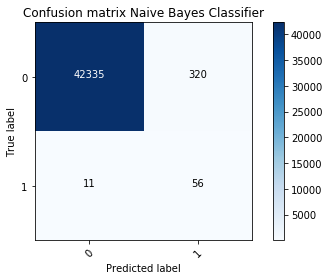

In [204]:
plot_confusion_matrix(cnf_matrix_NB,class_names,  title='Confusion matrix Naive Bayes Classifier')
TP = cnf_matrix_NB[1,1]
TN = cnf_matrix_NB[0,0]
FP = cnf_matrix_NB[0,1]
FN = cnf_matrix_NB[1,0]
TPR_NB=recall_score(y_test,NB_pred)
TNR_NB= TN/(TN + FP)
FPR_NB= FP/(TN + FP)
FNR_NB= FN/(FN + TP)

In [205]:
#print(classification_report(y_test,NB_pred))
from sklearn.metrics import recall_score
print(" Classification Accuracy-- ",accuracy_score(y_test,NB_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,NB_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,NB_pred ))  # recall is TP /(TP+FP)
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR-- ",(FP/(TN + FP)))
print(" Miss Rate/ FNR         -- ",(FN/(FN + TP)))

 Classification Accuracy--  0.9922522353822386
 Classification Error   --  0.007747764617761388
 Sensitivity/TPR/Recall --  0.835820895522388
 Specificity /TNR       --  0.9924979486578361
 False Positive Rate/FPR--  0.007502051342163873
 Miss Rate/ FNR         --  0.16417910447761194


# Evaluation Metrices
1. Classification Accuracy /Accuracy - Overall how often is the classifier correct ?
    (TP + TN ) /( TP + TN + FP + FN)
    
2. Classification Error/  - Overall How often is the classifier incorrect ?
    (FP + TN ) /( TP + TN + FP + FN)
 
3. Sensitivity/TPR/ Recall - When the actual value is positive , how often is the model prediction correct ?
    TP/( TP + FN)
    
4. Specificity/ TNR - When the actual value is negative , how often is the prediction correct
    TN( TN+ FP)
    
5. False Positive Rate/ FPR/ Fall Out - When the actual value is negative , how often is the prediction incorrect ?
    FP /( FP+TN)
  
6. Miss Rate/ FNR  - When a postive value is predicted, how often is the prediction correct
    FN /( TP+ FN)


# Logistic Regression



In [206]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()   

In [207]:
logmodel_balanced=logmodel.fit(X_train_res,y_train_res)# Model fit on Balanced data set

# Evaluation - Logistic Regression

In [208]:
print(" Balanced class Evaluation")                   
logmodel_test_pred = logmodel_balanced.predict(X_test)
accuracy_score(y_test, logmodel_test_pred)

 Balanced class Evaluation


0.9852534993680071

In [209]:
import itertools
class_names = [0,1]
cnf_matrix_Balanced_Logistic=confusion_matrix(y_test,logmodel_test_pred)

Confusion matrix, without normalization
[[42029   626]
 [    4    63]]


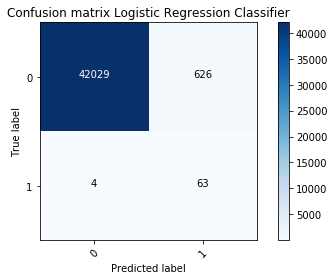

In [210]:
plot_confusion_matrix(cnf_matrix_Balanced_Logistic,class_names,  title='Confusion matrix Logistic Regression Classifier')
TP = cnf_matrix_Balanced_Logistic[1,1]
TN = cnf_matrix_Balanced_Logistic[0,0]
FP = cnf_matrix_Balanced_Logistic[0,1]
FN = cnf_matrix_Balanced_Logistic[1,0]
TPR_LR=recall_score(y_test,logmodel_test_pred)
TNR_LR= TN/(TN + FP)
FPR_LR= FP/(TN + FP)
FNR_lR= FN/(FN + TP)

In [211]:
#print(classification_report(y_test,logmodel_test_balanced))
print(" Classification Accuracy-- ",accuracy_score(y_test,logmodel_test_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,logmodel_test_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,logmodel_test_pred ))
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR/Fall Out -- ",(FP/(TN + FP)))
print(" Miss Rate/ FNR         -- ",(FN/(TP + FN)))

 Classification Accuracy--  0.9852534993680071
 Classification Error   --  0.014746500631992898
 Sensitivity/TPR/Recall --  0.9402985074626866
 Specificity /TNR       --  0.985324112061892
 False Positive Rate/FPR/Fall Out --  0.014675887938108076
 Miss Rate/ FNR         --  0.05970149253731343


# K Nearest Neighbors

In [212]:
from sklearn.neighbors import KNeighborsClassifier


In [213]:
# Selecting the number of nearest neigbhor
error_rate =[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    pred_k=knn.predict(X_val)
    accuracy=accuracy_score(y_val, pred_k)
    #print(k,accuracy)
    error_rate.append(np.mean(pred_k != y_val))

Text(0,0.5,'Error Rate')

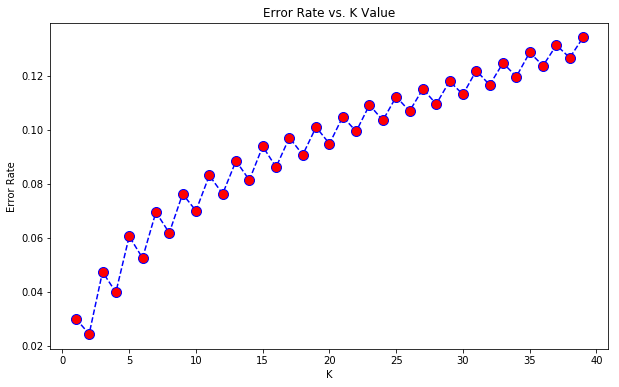

In [214]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [215]:
knn=KNeighborsClassifier(n_neighbors=2)
knn=knn.fit(X_train_res,y_train_res)

In [216]:
print(" Balanced class Evaluation")                   
knn_test_pred = knn.predict(X_test)
accuracy_score(y_test, knn_test_pred)


 Balanced class Evaluation


0.9746968774870091

In [217]:
import itertools
class_names = [0,1]
cnf_matrix_Balanced_knn=confusion_matrix(y_test,knn_test_pred)

Confusion matrix, without normalization
[[41606  1049]
 [   32    35]]


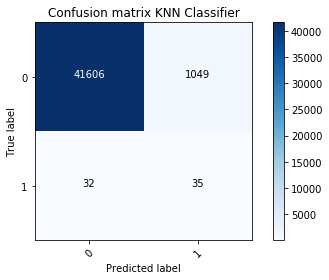

In [218]:
plot_confusion_matrix(cnf_matrix_Balanced_knn,class_names,  title='Confusion matrix KNN Classifier')
TN = cnf_matrix_Balanced_knn[0,0]
FP = cnf_matrix_Balanced_knn[0,1]
FN = cnf_matrix_Balanced_knn[1,0]
TP = cnf_matrix_Balanced_knn[1,1]
TPR_KNN=recall_score(y_test,knn_test_pred)
TNR_KNN= TN/(TN + FP)
FPR_KNN= FP/(TN + FP)
FNR_KNN= FN/(TP + FN)

In [219]:
#print(classification_report(y_test,logmodel_test_balanced))
print(" Classification Accuracy-- ",accuracy_score(y_test,knn_test_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,knn_test_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,knn_test_pred ))
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR-- ",(FP/(TN + FP)))
print(" Miss Rate / FNR         -- ",(FN/(TP + FN)))

 Classification Accuracy--  0.9746968774870091
 Classification Error   --  0.02530312251299094
 Sensitivity/TPR/Recall --  0.5223880597014925
 Specificity /TNR       --  0.975407337943969
 False Positive Rate/FPR--  0.024592662056030945
 Miss Rate / FNR         --  0.47761194029850745


# Voting Classifier [ Ensemble Method ] 

In [220]:
from sklearn.ensemble import VotingClassifier

In [221]:
eclf1 = VotingClassifier(estimators=[('Nb', NB_clf_balanced), ('log', logmodel_balanced), ('knn', knn)], voting='hard')

In [222]:
eclf1 = eclf1.fit(X_train_res, y_train_res)

In [223]:
print(" Balanced class Evaluation")                   
eclf_test_pred = eclf1.predict(X_test)
accuracy_score(y_test, eclf_test_pred)

 Balanced class Evaluation


C:\Users\Koundinya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9970741070174617

In [224]:
import itertools
class_names = [0,1]
cnf_matrix_Balanced_eclf=confusion_matrix(y_test,eclf_test_pred)

TN = cnf_matrix_Balanced_eclf[0,0]
FP = cnf_matrix_Balanced_eclf[0,1]
FN = cnf_matrix_Balanced_eclf[1,0]
TP = cnf_matrix_Balanced_eclf[1,1]

Confusion matrix, without normalization
[[42539   116]
 [    9    58]]


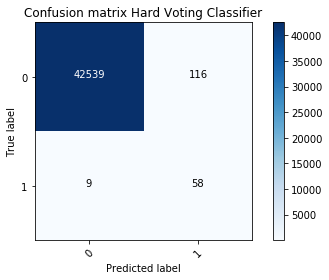

In [225]:
plot_confusion_matrix(cnf_matrix_Balanced_eclf,class_names,  title='Confusion matrix Hard Voting Classifier')

In [226]:
# Ensembled Evaluation
print(" Classification Accuracy-- ",accuracy_score(y_test,eclf_test_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,eclf_test_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,eclf_test_pred ))
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR-- ",(FP/(TN + FP)))
print(" Miss Rate / FNR         -- ",(FN/(TP + FN)))
TPR_HV=recall_score(y_test,eclf_test_pred)
TNR_HV= TN/(TN + FP)
FPR_HV= FP/(TN + FP)
FNR_HV= FN/(TP + FN)

 Classification Accuracy--  0.9970741070174617
 Classification Error   --  0.002925892982538314
 Sensitivity/TPR/Recall --  0.8656716417910447
 Specificity /TNR       --  0.9972805063884655
 False Positive Rate/FPR--  0.0027194936115344038
 Miss Rate / FNR         --  0.13432835820895522


#  Soft Voting 

In [227]:
from sklearn.ensemble import VotingClassifier

In [228]:
eclf2 = VotingClassifier(estimators=[('Nb', NB_clf_balanced), ('log', logmodel_balanced), ('knn', knn)], voting='soft')

In [229]:
eclf2 = eclf2.fit(X_train_res, y_train_res)

In [230]:
print(" Balanced class Evaluation")                   
eclf2_test_pred = eclf2.predict(X_test)
accuracy_score(y_test, eclf2_test_pred)

 Balanced class Evaluation


C:\Users\Koundinya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9969804784420205

In [231]:
import itertools
class_names = [0,1]
cnf_matrix_Balanced_eclf2=confusion_matrix(y_test,eclf2_test_pred)

Confusion matrix, without normalization
[[42535   120]
 [    9    58]]


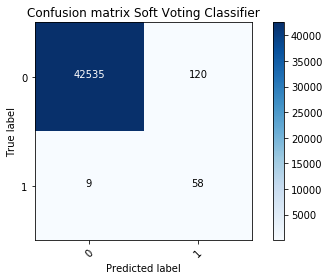

In [232]:
plot_confusion_matrix(cnf_matrix_Balanced_eclf2,class_names,  title='Confusion matrix Soft Voting Classifier')


TN = cnf_matrix_Balanced_eclf2[0,0]
FP = cnf_matrix_Balanced_eclf2[0,1]
FN = cnf_matrix_Balanced_eclf2[1,0]
TP = cnf_matrix_Balanced_eclf2[1,1]

TPR_SV=recall_score(y_test,eclf2_test_pred)
TNR_SV= TN/(TN + FP)
FPR_SV= FP/(TN + FP)
FNR_SV= FN/(TP + FN)

In [233]:
# Ensembled Evaluation
print(" Classification Accuracy-- ",accuracy_score(y_test,eclf2_test_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,eclf2_test_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,eclf2_test_pred ))
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR-- ",(FP/(TN + FP)))
print(" Miss Rate/ FNR         -- ",(FN/(TP + FN)))


 Classification Accuracy--  0.9969804784420205
 Classification Error   --  0.0030195215579794654
 Sensitivity/TPR/Recall --  0.8656716417910447
 Specificity /TNR       --  0.9971867307466885
 False Positive Rate/FPR--  0.0028132692533114523
 Miss Rate/ FNR         --  0.13432835820895522


# Create some more visualizations

In [234]:
import matplotlib.pyplot as plt
%matplotlib inline

In [236]:
# Results for Deep Learning From Google Collaboratory
TPR_MLP=1.0
TNR_MLP=0.99
FPR_MLP=.0002
FNR_MLP=0.0

In [240]:
FNR_results=[FNR_NB,FNR_lR,FNR_KNN,FNR_HV, FNR_SV,FNR_MLP]

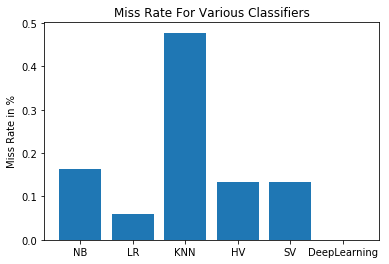

In [256]:
import numpy as np
x = np.arange(6)
plt.title('Miss Rate For Various Classifiers')
#plt.xlabel('Number of epochs')
plt.ylabel('Miss Rate in %')
plt.bar(x, FNR_results)
plt.xticks(x, ('NB', 'LR', 'KNN', 'HV','SV','DeepLearning'))
plt.show()

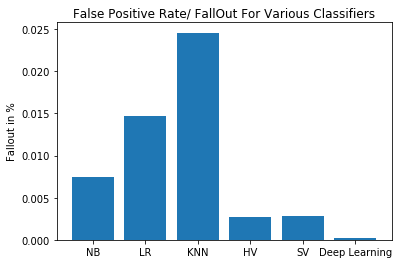

In [246]:
# Plots for 
FPR_results=[FPR_NB,FPR_LR,FPR_KNN,FPR_HV, FPR_SV,FPR_MLP]
import numpy as np
x = np.arange(6)
plt.title('False Positive Rate/ FallOut For Various Classifiers')
#plt.xlabel('Number of epochs')
plt.ylabel('Fallout in %')
plt.bar(x, FPR_results)
plt.xticks(x, ('NB', 'LR', 'KNN', 'HV','SV','Deep Learning'))
plt.show()